In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import metrics

In [2]:
url = 'https://raw.githubusercontent.com/asifabdullah-git/two_layer_nn/main/Data/CarBuyer.csv'
df = pd.read_csv(url, encoding='utf-8')
df2 = df.copy()

In [3]:
df2.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,carBuyer
0,5,1,9.0,2,0,5,1,0,2,2,5,1
1,5,1,6.0,3,3,5,0,1,1,2,4,1
2,5,1,6.0,3,3,5,1,1,5,2,4,1
3,5,2,7.0,0,0,5,0,1,10,2,5,1
4,5,2,8.0,5,5,5,1,4,2,2,5,1


In [4]:
print(df2.shape)
print(df2.dtypes)

(500, 12)
MaritalStatus             int64
Gender                    int64
YearlyIncome            float64
TotalChildren             int64
NumberChildrenAtHome      int64
EnglishEducation          int64
HouseOwnerFlag            int64
NumberCarsOwned           int64
CommuteDistance           int64
Region                    int64
Age                       int64
carBuyer                  int64
dtype: object


In [5]:
# Number of missing in each column
missing = pd.DataFrame(df2.isnull().sum()).rename(columns = {0: 'total_missing'})
missing

,total_missing
MaritalStatus,0
Gender,0
YearlyIncome,0
TotalChildren,0
NumberChildrenAtHome,0
EnglishEducation,0
HouseOwnerFlag,0
NumberCarsOwned,0
CommuteDistance,0
Region,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


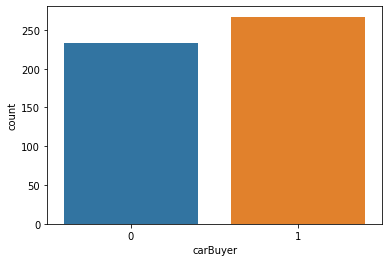

In [6]:
carbuyer = df2['carBuyer']
sns.countplot(carbuyer)

In [7]:
#Correlation between carBuyer and other features
print(df2.corr()["carBuyer"].abs().sort_values(ascending=False))

carBuyer                1.000000
Region                  0.195074
TotalChildren           0.158115
NumberChildrenAtHome    0.060880
EnglishEducation        0.053089
MaritalStatus           0.053089
CommuteDistance         0.039786
HouseOwnerFlag          0.026067
YearlyIncome            0.021118
Gender                  0.017953
NumberCarsOwned         0.009042
Age                     0.007647
Name: carBuyer, dtype: float64


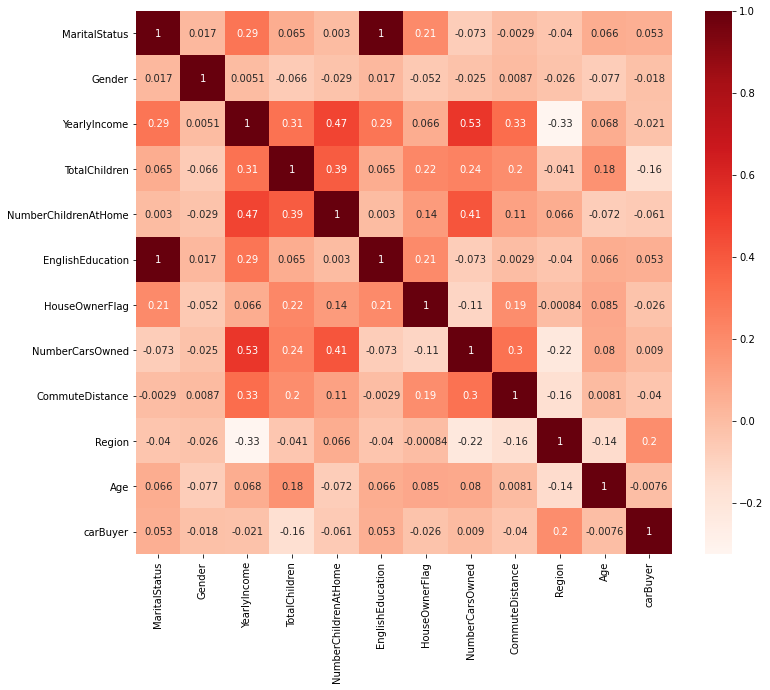

In [8]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
#duplicate_features = ['EnglishEducation']
#df2.drop(labels=duplicate_features, axis=1, inplace=True)

In [10]:
x = df2.iloc[:,:-1]
y = df2.iloc[: , -1]

In [11]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [13]:
tf.random.set_seed(2)

#input layer
input = Input(shape=(11,))

#Two hidden layers with 8 and 4 neurons
hidden1 = Dense(8, activation='relu')(input)
hidden2 = Dense(4, activation='relu')(hidden1)

# Output layer
output = Dense(1,activation='sigmoid')(hidden2)

In [14]:
model = Model(inputs=input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.004,name="Adam") #0.004

In [16]:
#opt = SGD(lr=0.01, momentum=0.9)

In [17]:
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
from keras.callbacks import  EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [19]:
history = model.fit(x_train, y_train, epochs=1000,validation_data=(x_test, y_test), batch_size=32,validation_split=0.3,callbacks=[es],verbose=0) #32

Epoch 00075: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


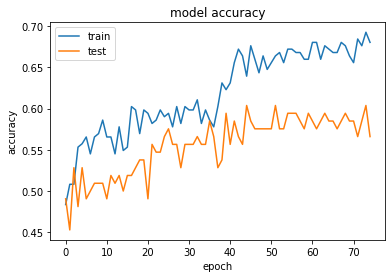

In [20]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.6200
Test accuracy: 0.6200000047683716


In [22]:
y_pred1 = model.predict(x_test)
y_pred = np.round(y_pred1)

In [23]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: ", round(acc, 1), "%" )

Accuracy:  62.0 %


In [24]:
def cm_function(cm11):
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                cm11.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cm11.flatten()/np.sum(cm11)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm11, annot=labels, fmt='', cmap='Blues')

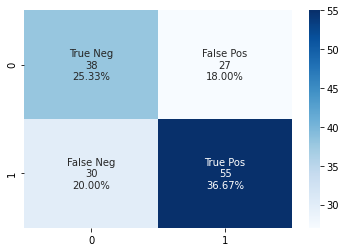

In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
#print (cm1)
cm_function(cm1)

In [37]:
print("Buying a car (prediction):\n" , y_pred[0:10])

Buying a car (prediction):
 [[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [38]:
print("Buying a car (actual):\n" ,y_test[0:10].to_string(index=False))

Buying a car (actual):
  0
 0
 0
 1
 1
 1
 0
 1
 0
 1
